In [13]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为SimHei
plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号

excel 读取

In [2]:
# 读取Excel文件
x =pd.DataFrame(pd.read_excel(r'D:\AI辅助医学\task1.xlsx')) 
y =pd.DataFrame(pd.read_excel(r'D:\AI辅助医学\task1.xlsx',sheet_name='Sheet2')) 
print(x)



       性别        BMI  年龄    腰围  0：从不吸烟 1：已戒烟 2：吸烟  \
0       1  20.692042  75  87.0                  0   
1       1  23.766041  70  78.0                  0   
2       2  21.125698  86  74.0                  0   
3       2  21.572978  72  75.0                  0   
4       1  28.353057  84  94.0                  0   
...    ..        ...  ..   ...                ...   
11807   2  23.883211  76  93.0                  0   
11808   1  20.820312  84  87.0                  1   
11809   2  23.399300  79  86.0                  0   
11810   1  19.356805  80  72.0                  0   
11811   2  30.700408  73  89.0                  0   

       0：从不饮酒 1：偶尔饮酒 2：经常饮酒 3：每天饮酒  0：每天锻炼 1：每周1次以上 2：偶尔锻炼 3：从不锻炼  健康状况  高血糖  \
0                                3                              0     2    1   
1                                1                              3     2    1   
2                                0                              3     2    1   
3                                0         

In [3]:
print(y)

       脑卒中
0        1
1        0
2        0
3        0
4        0
...    ...
11807    0
11808    0
11809    0
11810    0
11811    0

[11812 rows x 1 columns]


In [4]:
# split train data and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7, random_state=42)

In [5]:
# 检查数据集的维度
if x.shape[0] != y.shape[0]:
    raise ValueError("Input variables have inconsistent numbers of samples")

In [6]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
#xgb.plot_tree(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [7]:
# 使用测试数据预测类别
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
# 输出混淆矩阵
print(cm)

[[3453    2]
 [  89    0]]


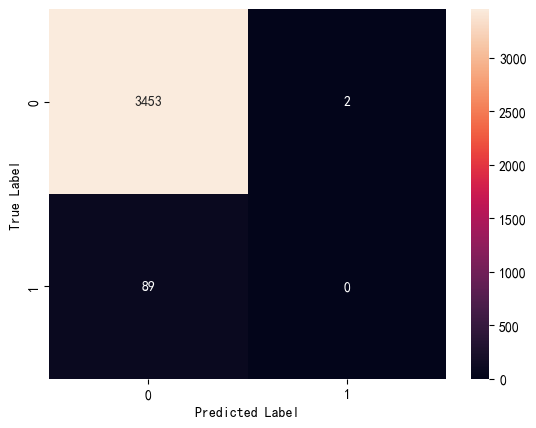

In [9]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [10]:
# 提取混淆矩阵中的值
TN, FP, FN, TP = cm.ravel()

# 计算准确率
accuracy = (TP + TN) / (TP + TN + FP + FN)

print(f"准确率: {accuracy:.2f}")

准确率: 0.97


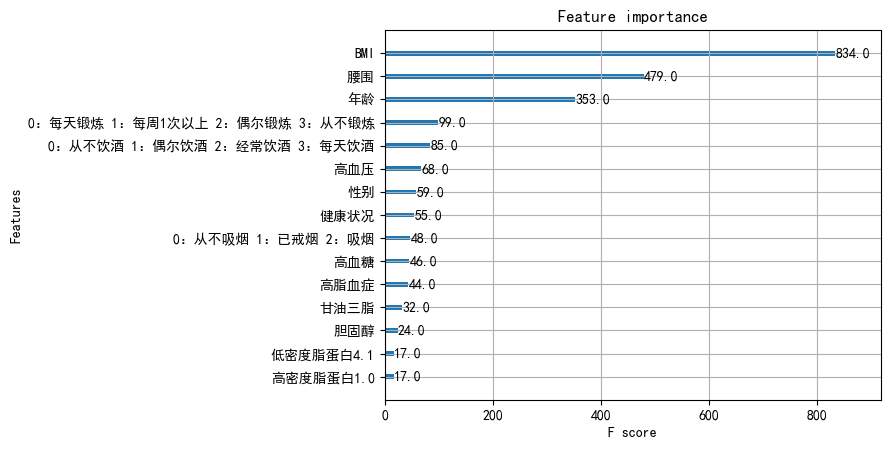

In [11]:
# 显示重要特征
plot_importance(model)
plt.show()

十折交叉验证

In [15]:
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',   # 回归任务设置为：'objective': 'reg:gamma',
    'num_class': 3,      # 回归任务没有这个参数
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}
 
 
plst = params.items()
 
 
dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)
 
 
# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)
 
 
# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1
 
 
print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))
 
 
# 显示重要特征
plot_importance(model)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [11812, 11794]